# Random Error Quantification in Machine Learning 
We build a simple model using the cruise_ship_info.csv data set for predicting a ship's crew size. We show that the R2 score metric used for evaluating the model is a random variable. Using k-fold cross-validation together with the random_state parameter used for partitioning the dataset into training and testing sets, we were able to quantify the random fluctuations of the R2 score.

Author: Benjamin O. Tayo
Date: 5/2/2020

# 1. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=4)),('slr', LinearRegression())])

# 2. Read dataset and select predictor and target variables

In [2]:
df=pd.read_csv("cruise_ship_info.csv")
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']
X = df[cols_selected].iloc[:,0:4].values     
y = df[cols_selected]['crew']  
sc_y = StandardScaler()
train_score = []
test_score =  []

# 3. Model Building and Evaluation

In [3]:
n = 15
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=i)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    train_score = np.append(train_score, np.mean(cross_val_score(pipe_lr, X_train, y_train_std, scoring ='r2' , cv = 10)))

In [4]:
train_mean = np.mean(train_score)
train_std = np.std(train_score)

In [5]:
print('R2 train: %.3f +/- %.3f' % (train_mean,train_std))

R2 train: 0.914 +/- 0.013


## 4. Visualization of the Results

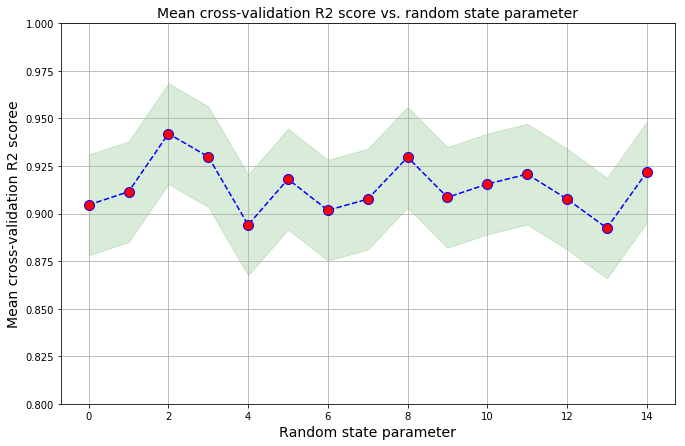

In [9]:
plt.figure(figsize=(11,7))
plt.plot(range(n),train_score,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.fill_between(range(n),
                 train_score + 2*train_std,
                 train_score - 2*train_std,
                 alpha=0.15, color='green')
plt.grid()
plt.ylim(0.8,1)
plt.title('Mean cross-validation R2 score vs. random state parameter', size = 14)
plt.xlabel('Random state parameter', size = 14)
plt.ylabel('Mean cross-validation R2 scoree', size = 14)
plt.show()